In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
dataset=pd.read_csv("churn_modelling.csv")
x=dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1:]

geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

x=pd.concat([x,geography,gender],axis=1)
x.drop(['Gender','Geography'],inplace=True,axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(f"confusion matrix\n{cm}")
print(f'accuracy_score={accuracy_score(y_test,y_pred)}')
print(f"classification report\n{classification_report(y_test,y_pred)}")


confusion matrix
[[5372  218]
 [1277  133]]
accuracy_score=0.7864285714285715
classification report
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5590
           1       0.38      0.09      0.15      1410

    accuracy                           0.79      7000
   macro avg       0.59      0.53      0.51      7000
weighted avg       0.72      0.79      0.73      7000



c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


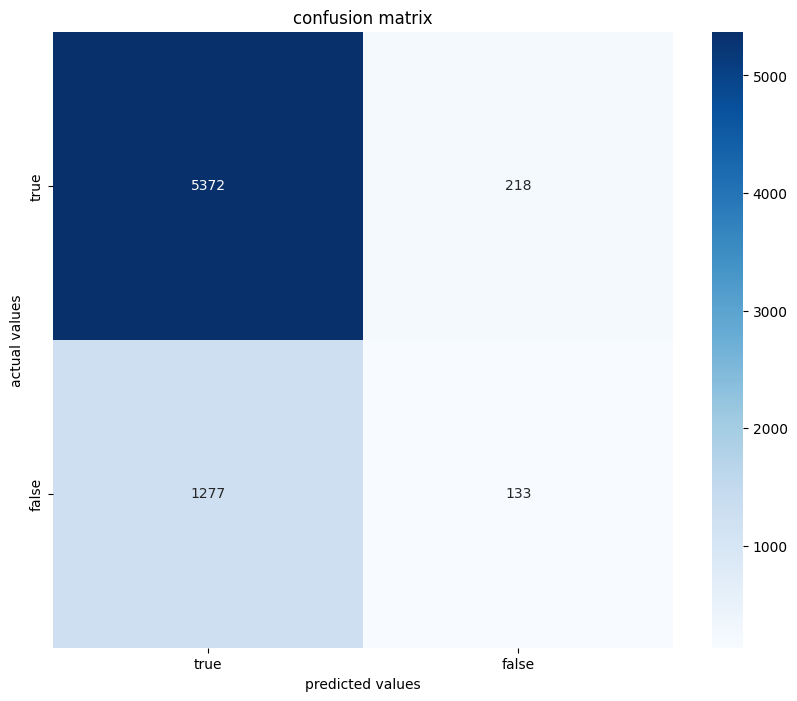

In [18]:
plt.figure(figsize=(10,8))
sb.heatmap(cm,fmt='d',cmap="Blues",annot=True,xticklabels=['true','false'],yticklabels=['true','false'])
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title("confusion matrix")
plt.show()